In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np

from rl_envs_forge.envs.grid_world.grid_world import GridWorld
from rl_envs_forge.envs.grid_world.mdp.mdp import GridWorldMDP

from value_iteration import value_iteration_v, value_iteration_q
from policy_iteration import policy_evaluation_v, find_optimal_policy_q
from visualize import draw_simple_gridworld

Optimal Policy: {(4, 0): 0, (3, 4): 2, (4, 3): 1, (3, 1): 0, (0, 2): 3, (2, 2): 0, (1, 0): 0, (1, 3): 0, (4, 2): 1, (3, 0): 0, (3, 3): 1, (0, 1): 3, (2, 4): 2, (1, 2): 0, (0, 4): 2, (2, 1): 0, (3, 2): 1, (4, 1): 1, (1, 1): 0, (0, 3): 3, (2, 0): 0, (1, 4): 2, (2, 3): 1}
Value Function: {(4, 0): {0: -3.439, 1: -3.439, 2: -4.0951, 3: -4.0951}, (3, 4): {0: -2.71, 1: -1.9, 2: -1, 3: -2.71}, (4, 3): {0: -2.71, 1: -1, 2: -1.9, 3: -2.71}, (3, 1): {0: -3.439, 1: -3.439, 2: -3.439, 3: -3.439}, (0, 2): {0: -2.71, 1: -3.439, 2: -3.439, 3: -1.9}, (2, 2): {0: -3.439, 1: -3.439, 2: -3.439, 3: -3.439}, (1, 0): {0: -1, 1: -2.71, 2: -2.71, 3: -1.9}, (1, 3): {0: -3.439, 1: -3.439, 2: -3.439, 3: -3.439}, (4, 2): {0: -3.439, 1: -1.9, 2: -2.71, 3: -3.439}, (3, 0): {0: -2.71, 1: -4.0951, 2: -4.0951, 3: -3.439}, (3, 3): {0: -3.439, 1: -1.9, 2: -1.9, 3: -3.439}, (0, 1): {0: -1.9, 1: -2.71, 2: -2.71, 3: -1}, (2, 4): {0: -3.439, 1: -2.71, 2: -1.9, 3: -3.439}, (1, 2): {0: -2.71, 1: -4.0951, 2: -4.0951, 3: -2.71},

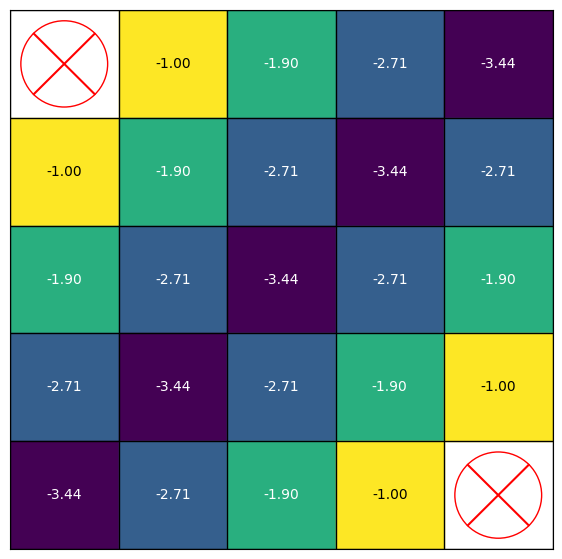

In [16]:
env = GridWorld(
    rows=5,
    cols=5,
    walls=None,
    start_state=(2, 2),
    terminal_states={(0, 0): -1, (4, 4): -1},
    rewards={
        "valid_move": -1,
        "wall_collision": -1,
        "out_of_bounds": -1,  # Added penalty for out-of-bounds
        "terminal_state": -1,  # Added reward for reaching terminal state
        "default": -1,
    },
)

# Build the MDP representation
t_r_dict = GridWorldMDP().build_mdp(env)

# Parameters for policy iteration
gamma = 0.9
theta = 1e-6

# Find the optimal policy using Q-value iteration
optimal_policy, optimal_value_function_q = find_optimal_policy_q(t_r_dict)

print("Optimal Policy:", optimal_policy)
print("Value Function:", optimal_value_function_q)

# Extract V from Q
states = list(set([s for s, _ in t_r_dict.keys()]))
V = {state: 0 for state in states}
optimal_V = policy_evaluation_v(states, optimal_policy, V, t_r_dict, gamma, theta)
print("Optimal Value Function:", optimal_V)

# Grid shape and walls for visualization
grid_shape = (env.rows, env.cols)
walls = env.walls  # Assuming walls are defined as a set of tuples (row, col)

# Draw the GridWorld with the optimal policy and value function
draw_simple_gridworld(
    grid_shape,
    walls,
    optimal_V,
    env.terminal_states,
    policy=None,
    enable_heatmap=True,
)

Optimal Policy: {(4, 0): 0, (3, 4): 2, (4, 3): 1, (3, 1): 0, (0, 2): 3, (2, 2): 0, (1, 0): 0, (1, 3): 0, (4, 2): 1, (3, 0): 0, (3, 3): 1, (0, 1): 3, (2, 4): 2, (1, 2): 0, (0, 4): 2, (2, 1): 0, (3, 2): 1, (4, 1): 1, (5, 2): 0, (1, 1): 0, (0, 3): 3, (2, 0): 0, (1, 4): 2, (2, 3): 1}
Value Function: {(4, 0): {0: -3.439, 1: -3.439, 2: -4.0951, 3: -4.0951}, (3, 4): {0: -2.71, 1: -1.9, 2: -1, 3: -2.71}, (4, 3): {0: -2.71, 1: -1, 2: -1.9, 3: -2.71}, (3, 1): {0: -3.439, 1: -3.439, 2: -3.439, 3: -3.439}, (0, 2): {0: -2.71, 1: -3.439, 2: -3.439, 3: -1.9}, (2, 2): {0: -3.439, 1: -3.439, 2: -3.439, 3: -3.439}, (1, 0): {0: -1, 1: -2.71, 2: -2.71, 3: -1.9}, (1, 3): {0: -3.439, 1: -3.439, 2: -3.439, 3: -3.439}, (4, 2): {0: -3.439, 1: -1.9, 2: -3.439, 3: -3.439}, (3, 0): {0: -2.71, 1: -4.0951, 2: -4.0951, 3: -3.439}, (3, 3): {0: -3.439, 1: -1.9, 2: -1.9, 3: -3.439}, (0, 1): {0: -1.9, 1: -2.71, 2: -2.71, 3: -1}, (2, 4): {0: -3.439, 1: -2.71, 2: -1.9, 3: -3.439}, (1, 2): {0: -2.71, 1: -4.0951, 2: -4.0951

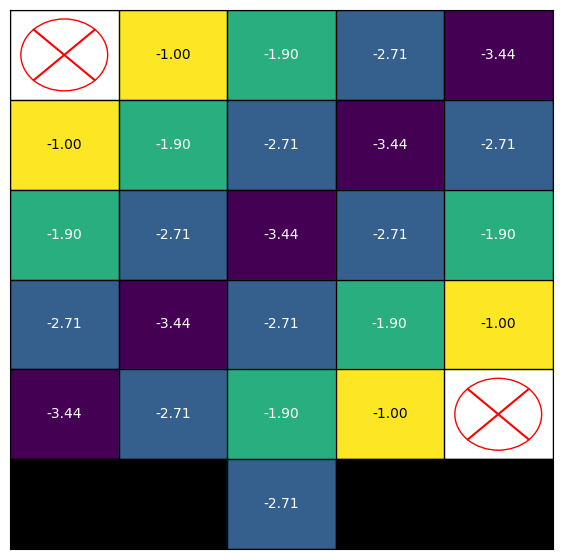

In [17]:
walls = [(5, 0), (5, 1), (5, 3), (5, 4)]
env = GridWorld(
    rows=6,
    cols=5,
    walls=walls,
    start_state=(2, 2),
    terminal_states={(0, 0): -1, (4, 4): -1},
    rewards={
        "valid_move": -1,
        "wall_collision": -1,
        "out_of_bounds": -1,  # Added penalty for out-of-bounds
        "terminal_state": -1,  # Added reward for reaching terminal state
        "default": -1,
    },
)

# Build the MDP representation
t_r_dict = GridWorldMDP().build_mdp(env)

# Parameters for policy iteration
gamma = 0.9
theta = 1e-6

# Find the optimal policy using Q-value iteration
optimal_policy, optimal_value_function_q = find_optimal_policy_q(t_r_dict)

print("Optimal Policy:", optimal_policy)
print("Value Function:", optimal_value_function_q)

# Extract V from Q
states = list(set([s for s, _ in t_r_dict.keys()]))
V = {state: 0 for state in states}
optimal_V = policy_evaluation_v(states, optimal_policy, V, t_r_dict, gamma, theta)
print("Optimal Value Function:", optimal_V)

# Grid shape and walls for visualization
grid_shape = (env.rows, env.cols)
walls = env.walls  # Assuming walls are defined as a set of tuples (row, col)

# Draw the GridWorld with the optimal policy and value function
draw_simple_gridworld(
    grid_shape,
    walls,
    optimal_V,
    env.terminal_states,
    policy=None,
    enable_heatmap=True,
)

# With random policy

In [2]:
from utils import create_random_policy, extract_V_from_Q
from policy_iteration import policy_evaluation_q_stochastic

{(4, 0): -8.764789045558985, (3, 4): -1, (4, 3): -1, (3, 1): -8.384051490282292, (0, 2): -6.09672377115235, (2, 2): -8.38405114283418, (1, 0): -1, (1, 3): -8.38405114283418, (4, 2): -6.096724046067457, (3, 0): -8.039034892009063, (3, 3): -6.096723877885237, (0, 1): -1, (2, 4): -6.096723877885237, (1, 2): -7.5163488659626285, (0, 4): -8.76478800001114, (2, 1): -7.5163488659626285, (3, 2): -7.516348885452193, (4, 1): -8.039034823349073, (1, 1): -6.096724048370817, (0, 3): -8.039034244533099, (2, 0): -6.096724302493026, (1, 4): -8.039034380845793, (2, 3): -7.516348885452193}


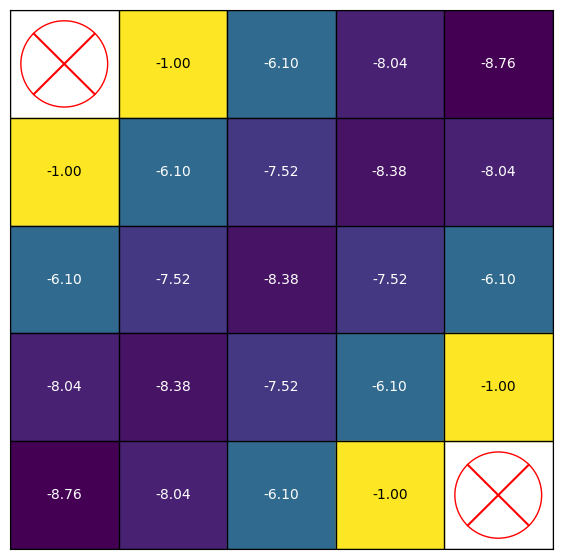

In [7]:
env = GridWorld(
    rows=5,
    cols=5,
    walls=None,
    start_state=(2, 2),
    terminal_states={(0, 0): -1, (4, 4): -1},
    rewards={
        "valid_move": -1,
        "wall_collision": -1,
        "out_of_bounds": -1,  # Added penalty for out-of-bounds
        "terminal_state": -1,  # Added reward for reaching terminal state
        "default": -1,
    },
)

# Build the MDP representation
t_r_dict = GridWorldMDP().build_mdp(env)

# Parameters for policy iteration
gamma = 0.9
theta = 1e-6

# Assuming 't_r_dict' is your transition-reward dictionary from the GridWorld environment
states = list(set([s for s, _ in t_r_dict.keys()]))
actions = list(set([a for _, a in t_r_dict.keys()]))

# Initialize Q-function
Q = {state: {action: 0 for action in actions} for state in states}

# Create a random policy
random_policy = create_random_policy(states, actions)

# Evaluate the policy
Q = policy_evaluation_q_stochastic(states, actions, random_policy, Q, t_r_dict, gamma=0.9, theta=1e-6)

# Extract the state-value function V from the Q-function
V_random_policy = extract_V_from_Q(Q, states)
print(V_random_policy)

# Grid shape and walls for visualization
grid_shape = (env.rows, env.cols)
walls = env.walls  # Assuming walls are defined as a set of tuples (row, col)

# Draw the GridWorld with the optimal policy and value function
draw_simple_gridworld(
    grid_shape,
    walls,
    V_random_policy,
    env.terminal_states,
    policy=None,
    enable_heatmap=True,
)

{(4, 0): -8.80449344964867, (3, 4): -1, (4, 3): -1, (3, 1): -8.412814853871767, (0, 2): -6.1034611326844, (2, 2): -8.400043855353232, (1, 0): -1, (1, 3): -8.400043855353232, (4, 2): -6.1772569493303, (3, 0): -8.062031180588317, (3, 3): -6.114689793881001, (0, 1): -1, (2, 4): -6.114689793881001, (1, 2): -7.5303517765924175, (0, 4): -8.773758332004201, (2, 1): -7.5303517765924175, (3, 2): -7.562709048858943, (4, 1): -8.270065670239632, (5, 2): -8.270065670239632, (1, 1): -6.103461367213184, (0, 3): -8.048237611670665, (2, 0): -6.107466007573722, (1, 4): -8.054556668133124, (2, 3): -7.562709048858943}


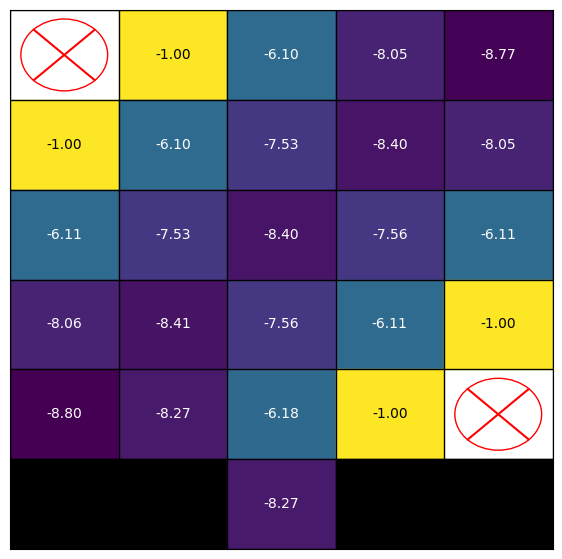

In [8]:
walls = [(5, 0), (5, 1), (5, 3), (5, 4)]
env = GridWorld(
    rows=6,
    cols=5,
    walls=walls,
    start_state=(2, 2),
    terminal_states={(0, 0): -1, (4, 4): -1},
    rewards={
        "valid_move": -1,
        "wall_collision": -1,
        "out_of_bounds": -1,  # Added penalty for out-of-bounds
        "terminal_state": -1,  # Added reward for reaching terminal state
        "default": -1,
    },
)

# Build the MDP representation
t_r_dict = GridWorldMDP().build_mdp(env)

# Parameters for policy iteration
gamma = 0.99
theta = 1e-6

# Assuming 't_r_dict' is your transition-reward dictionary from the GridWorld environment
states = list(set([s for s, _ in t_r_dict.keys()]))
actions = list(set([a for _, a in t_r_dict.keys()]))

# Initialize Q-function
Q = {state: {action: 0 for action in actions} for state in states}

# Create a random policy
random_policy = create_random_policy(states, actions)

# Evaluate the policy
Q = policy_evaluation_q_stochastic(states, actions, random_policy, Q, t_r_dict, gamma=0.9, theta=1e-6)

# Extract the state-value function V from the Q-function
V_random_policy = extract_V_from_Q(Q, states)
print(V_random_policy)

# Grid shape and walls for visualization
grid_shape = (env.rows, env.cols)
walls = env.walls  # Assuming walls are defined as a set of tuples (row, col)

# Draw the GridWorld with the optimal policy and value function
draw_simple_gridworld(
    grid_shape,
    walls,
    V_random_policy,
    env.terminal_states,
    policy=None,
    enable_heatmap=True,
)